In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.18.0


In [2]:
# Carregar e preprocessar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os valores dos pixels para [0, 1] e adicionar canal para imagens em escala de cinza
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Converter os rótulos em one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
# Criar o modelo com camadas convolucionais
model = keras.Sequential([
    # Primeira sequência de convolução
    Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), name="Conv1"),
    Conv2D(8, (3, 3), padding='same', activation='relu', name="Conv2"),
    MaxPooling2D(pool_size=(2, 2), name="Pool1"),

    # Segunda sequência de convolução
    Conv2D(16, (3, 3), padding='same', activation='relu', name="Conv3"),
    Conv2D(16, (3, 3), padding='same', activation='relu', name="Conv4"),
    MaxPooling2D(pool_size=(2, 2), name="Pool2"),

    # Camada de flatten e densas
    Flatten(name="Flatten"),
    Dense(40, activation='relu', name="Dense1"),
    Dense(10, activation='softmax', name="Output")
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Treinar o modelo
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8174 - loss: 0.5680 - val_accuracy: 0.9732 - val_loss: 0.0953
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9739 - loss: 0.0830 - val_accuracy: 0.9773 - val_loss: 0.0734
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9829 - loss: 0.0553 - val_accuracy: 0.9833 - val_loss: 0.0528
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9881 - loss: 0.0394 - val_accuracy: 0.9839 - val_loss: 0.0508
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9889 - loss: 0.0344 - val_accuracy: 0.9848 - val_loss: 0.0499


In [19]:
# Avaliar no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9850 - loss: 0.0469
Test Accuracy: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


d:\Monte Carlo Digital\Projeto MNIST\.env\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_24']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


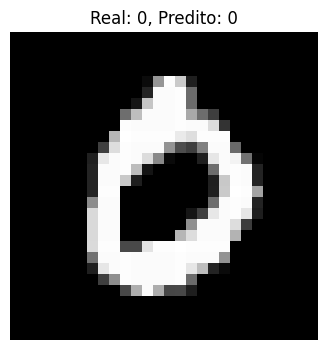

In [20]:
# Forçar a inicialização do modelo com uma entrada de exemplo
_ = model(np.zeros((1, 28, 28, 1)))

# Criar um modelo para visualizar os mapas de ativação
saidas_seq = [layer.output for layer in model.layers]  # Pegando todas as saídas das camadas
visualizacao_model = tf.keras.models.Model(inputs=model.inputs, outputs=saidas_seq)

# Selecionar uma imagem de teste
indice_img_teste = 3
img_teste = x_test[indice_img_teste:indice_img_teste + 1]

# Predição
mapas_sequenciais = visualizacao_model.predict(img_teste)

# Predizer o rótulo usando o modelo principal
predicao = model.predict(img_teste)
label_real = np.argmax(y_test[indice_img_teste])  # Rótulo real
label_predito = np.argmax(predicao[0])  # Rótulo predito

# Visualizar a imagem original com os rótulos
plt.figure(figsize=(4, 4))
plt.title(f"Real: {label_real}, Predito: {label_predito}")
plt.imshow(img_teste[0].squeeze(), cmap='gray')
plt.axis('off')  # Ocultar os eixos
plt.show()

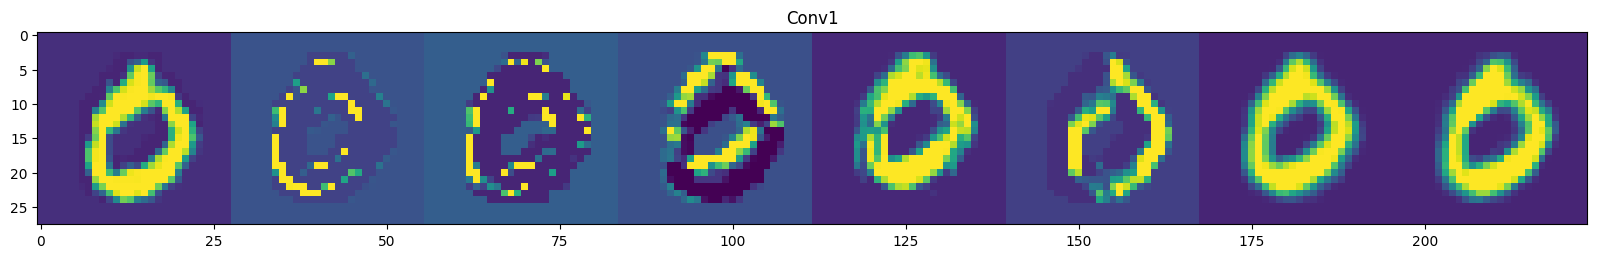

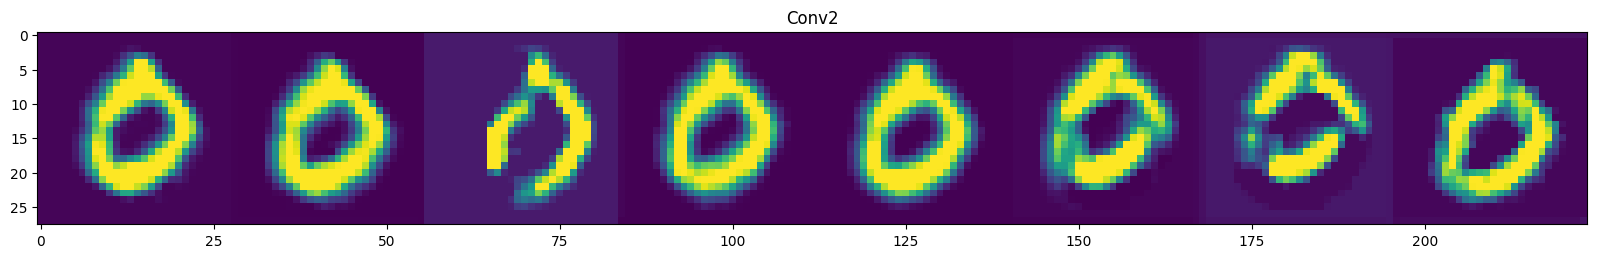

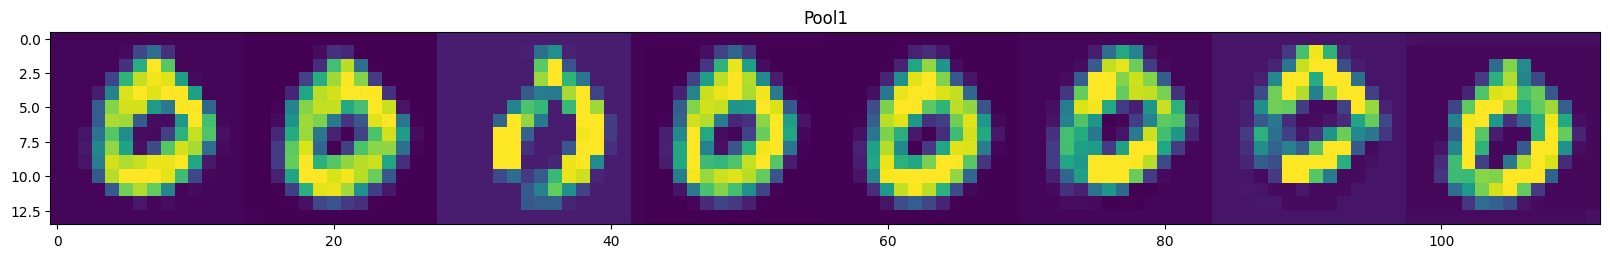

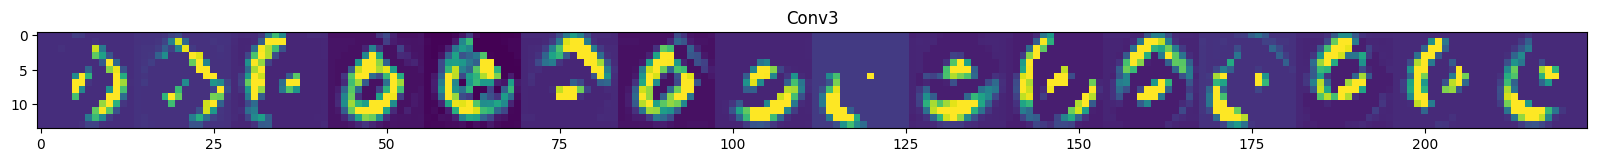

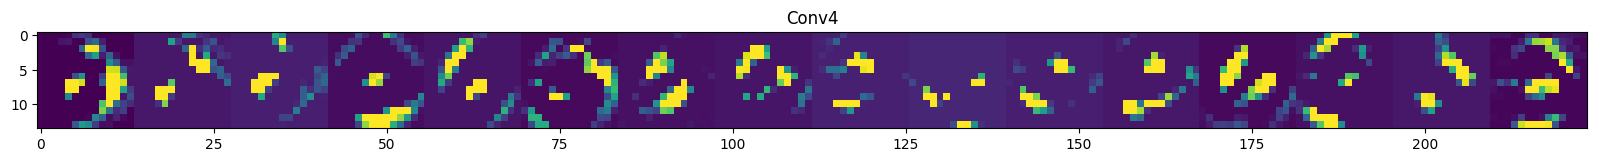

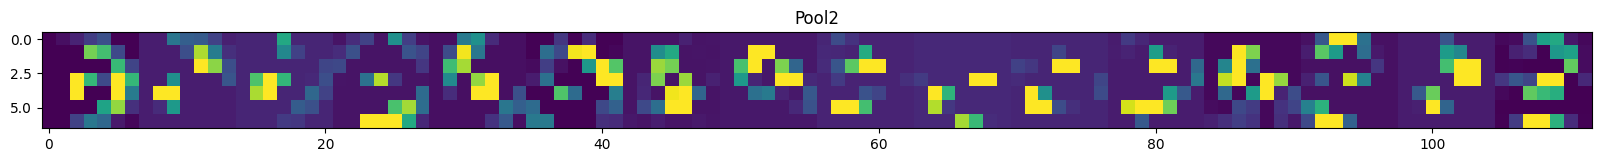

In [21]:
# Definir os nomes das camadas antes do loop
layer_nomes = [layer.name for layer in model.layers]

# Visualizar os mapas de ativação
for layer_name, feature_map in zip(layer_nomes, mapas_sequenciais):
    if len(feature_map.shape) == 4:  # Verificar se é uma camada convolucional
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= (x.std() + 1e-5)  # Evitar divisão por zero
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Preencher o grid horizontal
            display_grid[:, i * size: (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [22]:
# Imprimir a arquitetura do modelo e o número de parâmetros
print("Arquitetura do modelo:")
model.summary()

Arquitetura do modelo:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 28, 28, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 14, 14, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,888 (421.44 KB)

 Trainable params: 35,962 (140.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,926 (280.96 KB)

In [23]:
# Acessar a primeira camada convolucional
primeira_camada = model.get_layer("Conv1")

# Obter os pesos (kernels) e biases da camada
kernels, biases = primeira_camada.get_weights()

# Os kernels têm a forma (tamanho do filtro, tamanho do filtro, canais de entrada, número de filtros)
print(f"Forma dos filtros: {kernels.shape}")

print(f"\nFiltro {0}:")
print(kernels[:, :, :, 0])  # Os valores do filtro

Forma dos filtros: (3, 3, 1, 8)

Filtro 0:
[[[ 0.20654024]
  [ 0.46771657]
  [-0.10171001]]

 [[ 0.07914072]
  [ 0.36817566]
  [-0.16587994]]

 [[-0.20850694]
  [ 0.27878353]
  [-0.20866145]]]


In [24]:
# Salvar o modelo no formato HDF5
model.save('modelo_mnist.h5')